In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(5398, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5398 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


In [6]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5398,5398,5397,3515,4903,4735,5397,5397.000000,5397,5397,5397,5397
unique,5398,3,5397,2721,4749,475,1177,NaN,11,208,430,5381
top,s5398,Movie,Lal Patthar,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"October 1, 2018",NaN,TV-MA,1 Season,Stand-Up Comedy,"Paranormal activity at a lush, abandoned prope..."
freq,1,3464,1,17,14,1545,60,NaN,2246,1258,239,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.083936,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.121457,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN


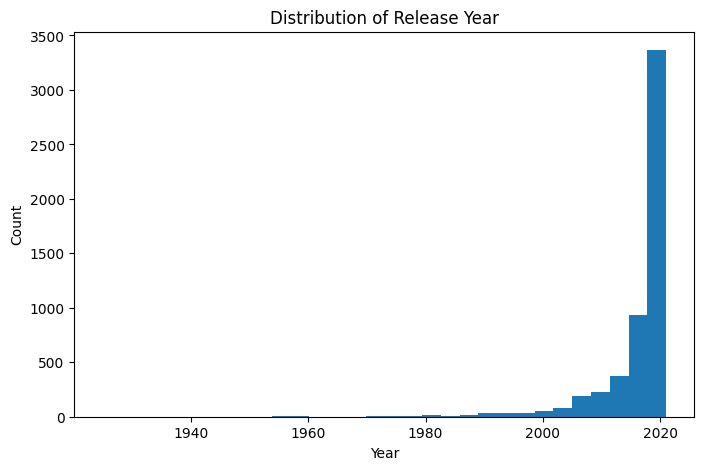

In [7]:
# Distribution of Numerical Features (Histogram)
plt.figure(figsize=(8,5))
plt.hist(df['release_year'], bins=30)
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

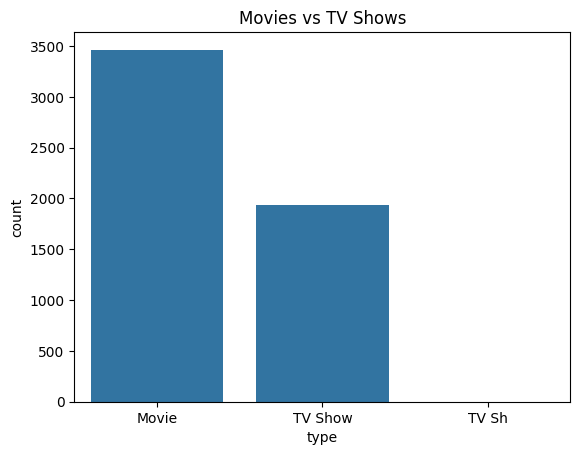

In [8]:
# Categorical Feature Analysis (Count Plots)
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()

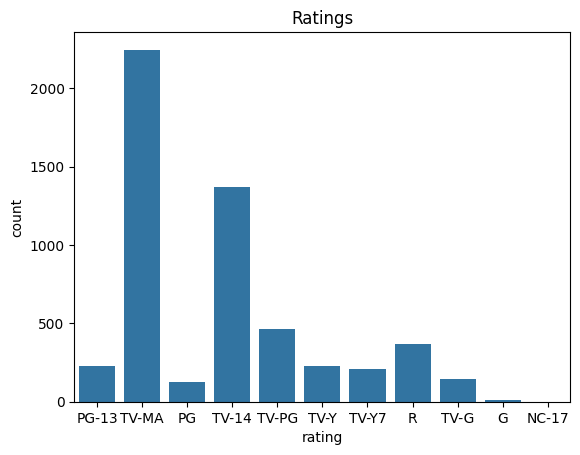

In [12]:
sns.countplot(x='rating', data=df)
plt.title("Ratings")
plt.show()

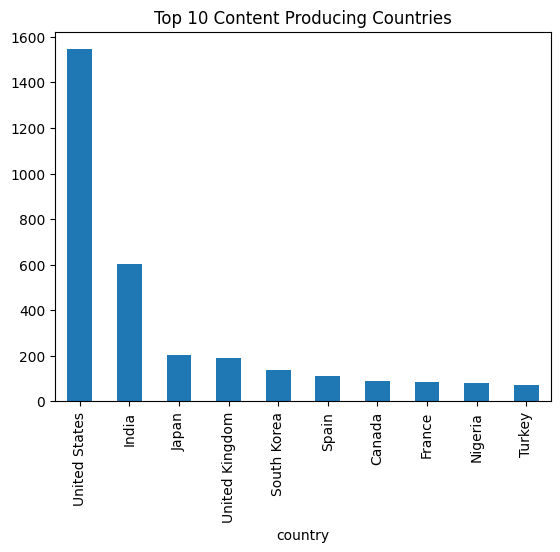

In [9]:
# Country Distribution (Top 10)
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.show()

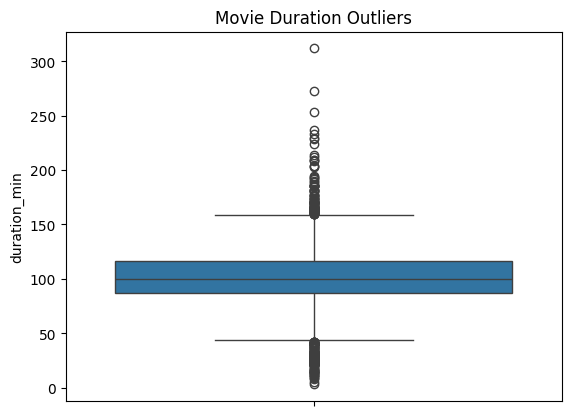

In [13]:
# Box Plot – Identify Outliers
movies = df[df['type'] == 'Movie'].copy()

movies['duration_min'] = (
    movies['duration']
    .str.replace(' min', '', regex=False)
    .astype(float)
)

sns.boxplot(y=movies['duration_min'])
plt.title("Movie Duration Outliers")
plt.show()

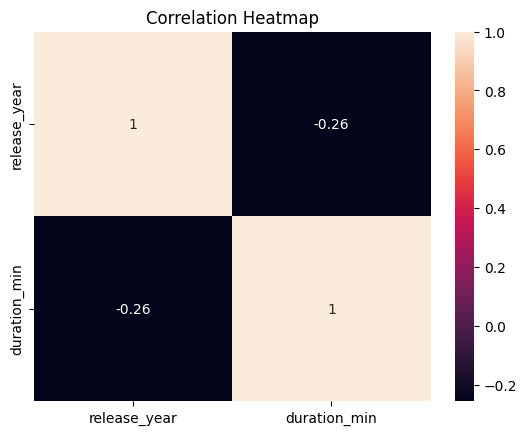

In [11]:
# Correlation Heatmap (Numerical Features)
numeric_df = movies[['release_year','duration_min']]
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()